## Regression with XGBoost
- apply XGBoost to the regression task of predicting house prices in Ames, Iowa. 
- learn about the two kinds of base learners that XGboost can use as its weak learners, 
- and review how to evaluate the quality of your regression models.


#### Decision trees as base learners

- build an XGBoost model to predict house prices in Ames, Iowa!
- goal is to use trees as base learners. By default, XGBoost uses trees as base learners

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [3]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators= 10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


### Linear base learners
- use trees as base models in XGBoost, let's use the other kind of base model that can be used with `XGBoost` - a linear learner. 
- This model, although not as commonly used in `XGBoost`, it allows to create a regularized linear regression using `XGBoost`'s powerful learning API. However, because it's uncommon, XGBoost's own is used with `non-scikit-learn` compatible functions to build the model, such as `xgb.train()`.
- **To do this**
    - create the parameter dictionary that describes the kind of booster to use (similarly to xgb.cv()). 
    - The key-value pair that defines the booster type (base model) is "booster":"gblinear".
- Once the model created, use the .train() and .predict() methods of the model.

In [4]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44395.073792


>  it looks like Decision trees as base learners performed better

### Evaluating model quality
- compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data

In [5]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.531250      429.448328   142980.433594    1193.789595
1    102832.542969      322.468976   104891.392578    1223.157953
2     75872.617188      266.473250    79478.937500    1601.344539
3     57245.650391      273.625908    62411.924805    2220.148314
4     44401.295899      316.422824    51348.281250    2963.379118
4    51348.28125
Name: test-rmse-mean, dtype: float64


In [6]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.572266     668.344199  127633.988282   2403.993968
1    89770.056641     456.949630   90122.498047   2107.907095
2    63580.791016     263.405561   64278.559571   1887.564512
3    45633.141602     151.886070   46819.167969   1459.813514
4    33587.092774      86.999470   35670.649414   1140.607637
4    35670.649414
Name: test-mae-mean, dtype: float64


### Using regularization in XGBoost
- vary the l2 regularization penalty - also known as "lambda" - and see its effect on overall model performance on the Ames housing dataset.

In [7]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.066406
2  100  76624.628907


> It looks like as as the value of `lambda` increases, so does the `RMSE`.

### Visualizing individual XGBoost trees
- used `XGBoost` to both build and evaluate regression as well as classification models, 
- now get a handle on how to visually explore your models. Here, individual trees from the fully boosted model that `XGBoost` creates using the entire housing dataset will be visualized.
- To do: 
    - `XGBoost` has a `plot_tree()` function that makes this type of visualization easy.
    - train a model using the `XGBoost` learning API, 
    - then pass it to the `plot_tree()` function along with the number of trees wanted to plot using the num_trees argument.

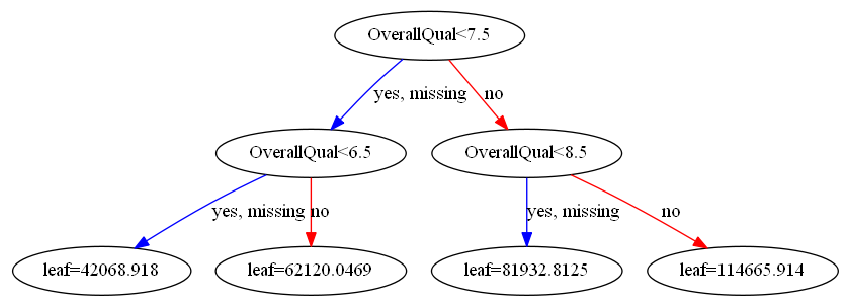

In [19]:

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
fig, ax = plt.subplots(figsize=(15, 12))
xgb.plot_tree(booster = xg_reg, num_trees=0, ax=ax)

plt.show()

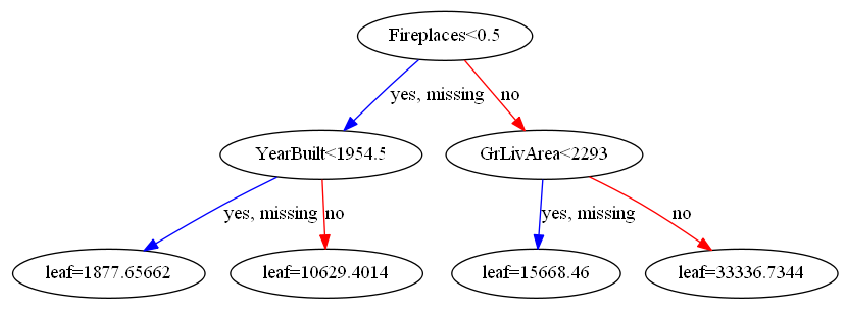

In [22]:
# Plot the fifth tree
fig, ax = plt.subplots(figsize=(15, 12))
xgb.plot_tree(booster = xg_reg, num_trees=4, ax=ax)
plt.show()

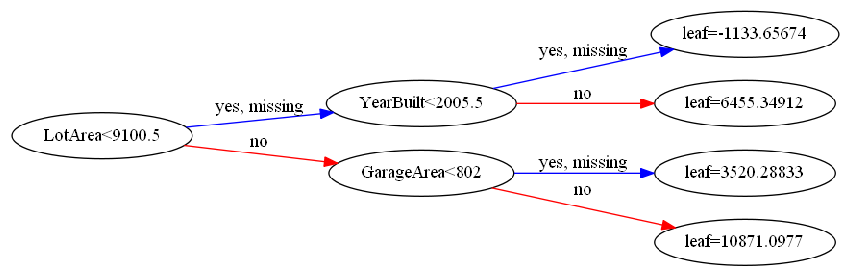

In [31]:
# Plot the fifth tree
fig, ax = plt.subplots(figsize=(15, 12))
xgb.plot_tree(booster = xg_reg, num_trees=9, rankdir ='LR',ax=ax)
plt.show()

### Visualizing feature importances: What features are most important in my dataset
- examine the importance of each feature column in the original dataset within the model.
- to do: 
    - counting the number of times each feature is split on across all boosting rounds (trees) in the model, 
    - and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. 
    - use `plot_importance()` function of XGBoost

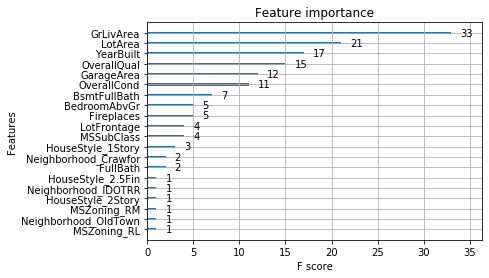

In [33]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label= y)

# Create the parameter dictionary: params
params = {'objective': 'reg:squarederror', 'max_depth':4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg )
plt.show()